<a href="https://colab.research.google.com/github/KornelWitkowski/TensorFlow-benchmarks/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification

## Fashion MNIST

In [ ]:
import os
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, Reshape
from tensorflow.keras import Sequential

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
def create_model_checkpoint(model_name, save_path="best_models"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_accuracy",
                                              verbose=0,
                                              save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                 factor=0.1,
                                                 patience=3,
                                                 verbose=1)

In [ ]:
model = Sequential(name="model_mnist")
model.add(Rescaling(1/255.0))
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_1 = model.fit(x=train_images,
                      y=train_labels,
                      validation_data=(test_images, test_labels),
                      epochs=30,
                      callbacks=[reduce_lr, create_model_checkpoint(model.name) ])

Epoch 1/30
1875/1875 [==============================] - 18s 3ms/step - loss: 0.4402 - accuracy: 0.8433 - val_loss: 0.3668 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3110 - accuracy: 0.8890 - val_loss: 0.3256 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2651 - accuracy: 0.9040 - val_loss: 0.2952 - val_accuracy: 0.8909 - lr: 0.0010
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2358 - accuracy: 0.9133 - val_loss: 0.3036 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2132 - accuracy: 0.9206 - val_loss: 0.2712 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1923 - accuracy: 0.9287 - val_loss: 0.2858 - val_accuracy: 0.9016 - lr: 0.0010
Epoch 7/30
1875/1875 [==============================] - 6

In [ ]:
model_best = tf.keras.models.load_model(f"best_models/{model.name}")

model.evaluate(test_images, test_labels)
model_best.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2786 - accuracy: 0.9172


[0.27855756878852844, 0.9172000288963318]

## horses_or_humans

In [26]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [27]:
(train_data, test_data), ds_info = tfds.load(name="horses_or_humans",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteRY95TZ/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteRY95TZ/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [28]:
ds_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [29]:
len(train_data), len(test_data)

(1027, 256)

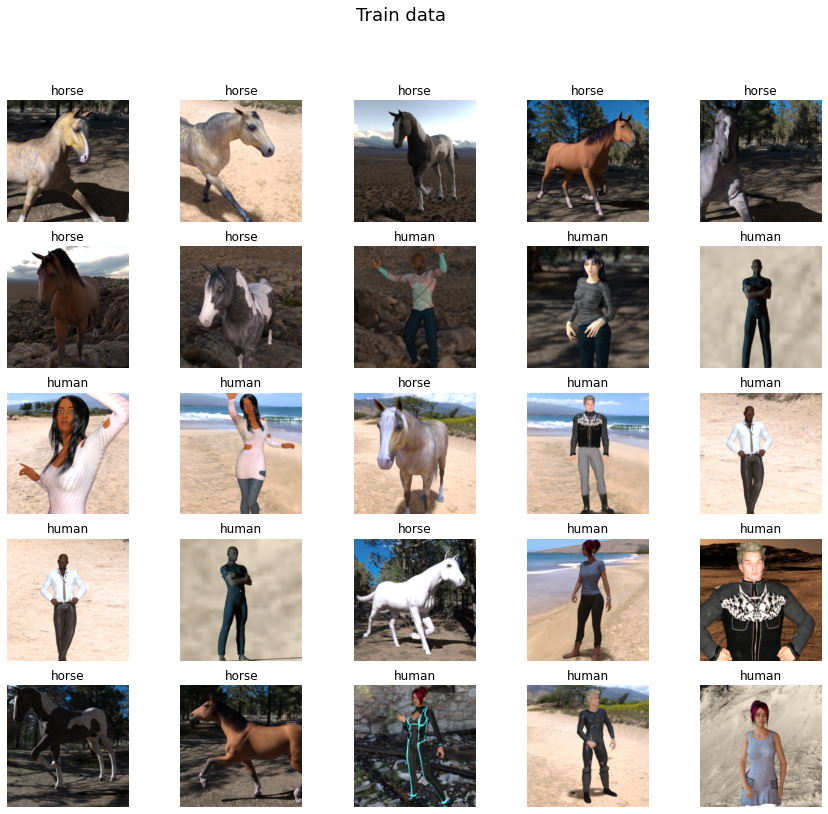

In [30]:
import matplotlib.pyplot as plt

class_names = ["horse", "human"]

fig, axs = plt.subplots(5, 5, figsize=(15, 13))
fig.suptitle('Train data', fontsize=18)

for i, (image, label) in enumerate(train_data.take(25)):
  axs[i//5, i%5].imshow(image)
  axs[i//5, i%5].set_title(f"{class_names[label]}")
  axs[i//5, i%5].axis("off")

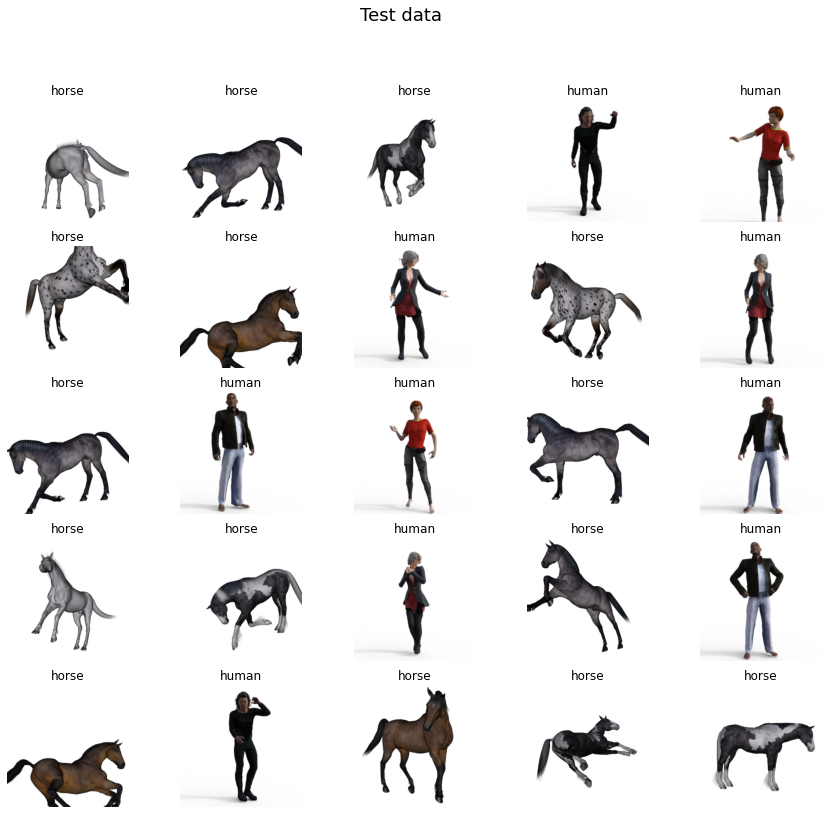

In [31]:
fig, axs = plt.subplots(5, 5, figsize=(15, 13))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_data.take(25)):
  axs[i//5, i%5].imshow(image)
  axs[i//5, i%5].set_title(f"{class_names[label]}")
  axs[i//5, i%5].axis("off")

In [32]:
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [33]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation

data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                         RandomRotation(0.2),
                                         RandomZoom(0.2),
                                         RandomTranslation(0.2, 0.2)])

In [34]:
import os

def create_model_checkpoint(model_name, save_path="best_models"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            monitor="val_accuracy",
                                            save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.5,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)      

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling, Dropout

model = Sequential([Rescaling(1/255.0),
                      data_augmentation,
                      Conv2D(filters=20,
                            kernel_size=4,
                            strides=1,
                            padding="valid",
                            activation="relu",
                            input_shape=(300,300,3)),
                      Conv2D(30, 3, activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(30, 3, activation="relu"),
                      MaxPool2D(pool_size=2),
                      Flatten(),
                      Dropout(0.5),
                      Dense(128),
                      Dense(1, activation="sigmoid")
], name="model_humans_and_horses")

model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=20,
                    validation_steps=2,
                    validation_data=test_data,
                    callbacks=[reduce_lr, create_model_checkpoint(model.name)])

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 1.9141 - accuracy: 0.5813INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


33/33 [==============================] - 14s 219ms/step - loss: 1.9141 - accuracy: 0.5813 - val_loss: 0.6783 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 2/20
32/33 [============================>.] - ETA: 0s - loss: 0.5262 - accuracy: 0.7422INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


33/33 [==============================] - 10s 210ms/step - loss: 0.5247 - accuracy: 0.7429 - val_loss: 0.7277 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 3/20
32/33 [============================>.] - ETA: 0s - loss: 0.5171 - accuracy: 0.7451
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 [==============================] - 7s 118ms/step - loss: 0.5168 - accuracy: 0.7449 - val_loss: 1.9716 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 7s 120ms/step - loss: 0.4059 - accuracy: 0.8130 - val_loss: 2.2548 - val_accuracy: 0.5469 - lr: 5.0000e-04
Epoch 5/20
32/33 [============================>.] - ETA: 0s - loss: 0.3318 - accuracy: 0.8477
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
33/33 [==============================] - 7s 119ms/step - loss: 0.3315 - accuracy: 0.8481 - val_loss: 1.5905 - val_accuracy: 0.5625 - lr: 5.0000e-04
Epoch 6/20
33/33 [==============================] - 7s 120ms/ste

## rock_paper_scissors

In [18]:
import tensorflow_datasets as tfds

(train_dataset, test_dataset), ds_info = tfds.load(name='rock_paper_scissors',
                                                   data_dir='tmp',
                                                   as_supervised=True,
                                                   with_info=True,
                                                   split=[tfds.Split.TRAIN, tfds.Split.TEST] )

In [15]:
ds_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [16]:
import tensorflow as tf

train_data = train_dataset.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [25]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
                      Conv2D(filters=30,
                            kernel_size=5,
                            strides=1,
                            padding="valid",
                            activation="relu",
                            input_shape=(300, 300, 3)),
                      Conv2D(30, 3, activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(30, 3, activation="relu"),
                      MaxPool2D(pool_size=2),
                      Flatten(),
                      Dense(3, activation="softmax")
])

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
79/79 [==============================] - 14s 151ms/step - loss: 58.4046 - accuracy: 0.7690 - val_loss: 2.4471 - val_accuracy: 0.5806
Epoch 2/5
79/79 [==============================] - 13s 147ms/step - loss: 0.0171 - accuracy: 0.9960 - val_loss: 4.1374 - val_accuracy: 0.5672
Epoch 3/5
79/79 [==============================] - 13s 146ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 4.6428 - val_accuracy: 0.5699
Epoch 4/5
79/79 [==============================] - 14s 148ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.9886 - val_accuracy: 0.5699
Epoch 5/5
79/79 [==============================] - 13s 146ms/step - loss: 4.3868e-04 - accuracy: 1.0000 - val_loss: 5.2374 - val_accuracy: 0.5645


## MNIST

In [39]:
mnist_data, info = tfds.load("mnist",
                              shuffle_files=True,
                              with_info=True,
                              as_supervised=True)

mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

len(mnist_train), len(mnist_test)

(60000, 10000)

In [40]:
import tensorflow as tf

train_dataset = mnist_train.batch(128).prefetch(tf.data.AUTOTUNE)
test_dataset = mnist_test.batch(128).prefetch(tf.data.AUTOTUNE)

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_1 = Sequential([Flatten(),
                      Dense(128, "relu"),
                      Dense(64, "relu"),
                      Dense(10, "softmax")])

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_1.fit(train_dataset,
            epochs=30,
            steps_per_epoch=len(train_dataset),
            validation_data=test_dataset,
            callbacks=[EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
                        ReduceLROnPlateau(monitor="val_accuracy", patience=4)]
)

Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 3.3672 - accuracy: 0.8383 - val_loss: 0.8041 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.5359 - accuracy: 0.9128 - val_loss: 0.5090 - val_accuracy: 0.9114 - lr: 0.0010
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.9365 - val_loss: 0.4374 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.9501 - val_loss: 0.3626 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1650 - accuracy: 0.9578 - val_loss: 0.3639 - val_accuracy: 0.9299 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1385 - accuracy: 0.9630 - val_loss: 0.3128 - val_accuracy: 0.9381 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - lo

## tf_flowers